In [4]:
import numpy as np

##### 查看各点的坐标

In [5]:
samples = np.loadtxt("kmeansSamples.txt")
print(samples)

[[ 8.76474369 14.97536963]
 [ 4.54577845  7.39433243]
 [ 5.66184177 10.45327224]
 [ 6.02005553 18.60759073]
 [12.56729723  5.50656992]
 [ 4.18694228 14.02615036]
 [ 5.72670608  8.37561397]
 [ 4.09989928 14.44273323]
 [ 2.25717893  1.97789559]
 [ 4.66913545  0.77178038]
 [ 8.1219476   0.79762128]
 [ 0.07972278 -1.9386662 ]
 [ 8.37004706 10.77781799]
 [ 6.6809732  15.53118858]
 [ 5.99194694 16.57732864]
 [ 5.64199016 15.54671014]
 [-2.92514764 11.0884457 ]
 [ 4.99694961  1.98673206]
 [ 3.8665841  -1.75282591]
 [ 2.62642744 22.08897582]
 [ 5.65622583 14.77736975]
 [-0.33882279  5.56931142]
 [10.93574482 11.24487206]
 [ 4.65023576 12.78869503]
 [ 8.49848513  9.78769711]
 [ 7.53046709  8.50232567]
 [ 6.17118371 21.74394049]
 [-0.93339496  1.59414249]
 [-6.37700491  3.46389409]
 [ 7.13598091 14.17794597]]


##### 定义欧式距离计算函数

In [6]:
def L2(vecXi, vecXj):
    '''
    计算欧氏距离
    para vecXi：点坐标，向量
    para vecXj：点坐标，向量
    retrurn: 两点之间的欧氏距离
    '''
    return np.sqrt(np.sum(np.power(vecXi - vecXj, 2)))

##### 定义kmeans迭代函数

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
def kMeans(S, k, distMeas=L2):
    '''
    K均值聚类
    para S：样本集，多维数组
    para k：簇个数
    para distMeas：距离度量函数，默认为欧氏距离计算函数
    return sampleTag：一维数组，存储样本对应的簇标记
    return clusterCents：一维数组，各簇中心
    retrun SSE:误差平方和
    '''
    m = np.shape(S)[0] # 样本总数
    sampleTag = np.zeros(m)
    
    # 随机产生k个初始簇中心
    n = np.shape(S)[1] # 样本向量的特征数
    clusterCents = np.mat([[-1.93964824,2.33260803],[7.79822795,6.72621783],[10.64183154,0.20088133]]) # 为实验可重复性，此外注释掉随机产生簇中心的代码，改为指定三个簇中心
    #clusterCents = np.mat(np.zeros((k,n)))
    #for j in range(n):
    #    minJ = min(S[:,j]) 
    #    rangeJ = float(max(S[:,j]) - minJ)
    #    clusterCents[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))
        
    sampleTagChanged = True
    SSE = 0.0
    while sampleTagChanged: # 如果没有点发生分配结果改变，则结束
        sampleTagChanged = False
        SSE = 0.0
        
        # 计算每个样本点到各簇中心的距离
        for i in range(m):
            minD = np.inf
            minIndex = -1
            for j in range(k):
                d = distMeas(clusterCents[j,:],S[i,:])
                if d < minD:
                    minD = d
                    minIndex = j
            if sampleTag[i] != minIndex: 
                sampleTagChanged = True
                sampleTag[i] = minIndex
            SSE += minD**2
        print(clusterCents)
        # 为了演示分簇过程，在每次迭代中都画出簇心和簇成员
        plt.scatter(clusterCents[:,0].tolist(),clusterCents[:,1].tolist(),c='r',marker='^',linewidths=7)
        plt.scatter(S[:,0],S[:,1],c=sampleTag,linewidths=np.power(sampleTag+0.5, 2)) # 用不同大小的点来表示不同簇的点
        plt.show()
        print("SSE:"+str(SSE))
        print("SC:"+str(silhouette_score(S, sampleTag, metric='euclidean')))
        print("DBI:"+str(davies_bouldin_score(S, sampleTag)))

        print("- - - - - - - - - - - - - - - - - - - - - - - -")
        
        # 重新计算簇中心
        for i in range(k):
            ClustI = S[np.nonzero(sampleTag[:]==i)[0]]
            clusterCents[i,:] = np.mean(ClustI, axis=0) 
    return clusterCents, sampleTag, SSE


[[-1.93964824  2.33260803]
 [ 7.79822795  6.72621783]
 [10.64183154  0.20088133]]


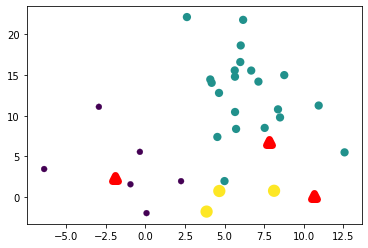

SSE:1674.1944460020268
SC:0.36330823543770285
DBI:0.8056369072268063
- - - - - - - - - - - - - - - - - - - - - - - -
[[-1.37291143  3.62583718]
 [ 6.49809152 12.82443961]
 [ 5.55255572 -0.06114142]]


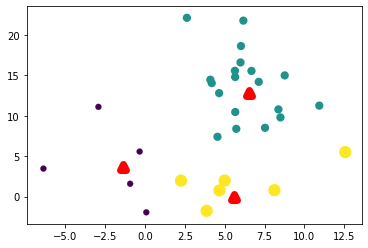

SSE:641.6091611948824
SC:0.4332385538550796
DBI:0.8403130057712209
- - - - - - - - - - - - - - - - - - - - - - - -
[[-2.0989295   3.9554255 ]
 [ 6.25766711 13.77999631]
 [ 6.07984882  1.54796222]]


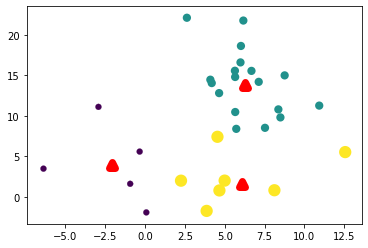

SSE:595.6061857081733
SC:0.41650941198623886
DBI:0.8981951114181145
- - - - - - - - - - - - - - - - - - - - - - - -
[[-2.0989295   3.9554255 ]
 [ 6.35277204 14.13475541]
 [ 5.86069591  2.38315796]]


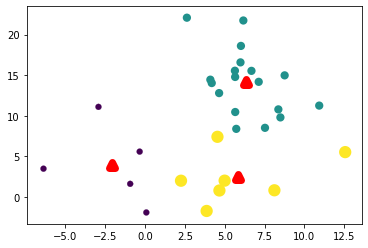

SSE:587.9589447573272
SC:0.41650941198623886
DBI:0.8981951114181145
- - - - - - - - - - - - - - - - - - - - - - - -
[[-2.0989295   3.9554255 ]
 [ 6.35277204 14.13475541]
 [ 5.86069591  2.38315796]]
587.9589447573272


In [9]:
import matplotlib.pyplot as plt
samples = np.loadtxt("kmeansSamples.txt")
clusterCents, sampleTag, SSE = kMeans(samples, 3)
plt.show()
print(clusterCents)
print(SSE)

In [6]:
sampleTag

array([1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 0., 1., 1., 1., 1., 0.,
       2., 2., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1.])